In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c = 3.*10**8  # Speed of light
ang_vel = 7.27*10**-5  # Earth's angular velocity (rad/s)
int_time = 10.  # Integration time (s)
min_frequency = 12. * 1e6  # Hz
max_frequency = 85. * 1e6  # Hz
chan_width = 24. * 1e3  # Hz
lat = np.radians(37.2)  # Telescope latitude (rad)
bl_length = 2400.  # Max baseline length (m)

In [3]:
z = np.radians(0.)  # Source zenith angle (rad)
decorr = 1 - c/(np.pi*int_time*ang_vel*np.cos(lat+z)*np.cos(z)*bl_length*max_frequency)*np.sin(np.pi*int_time*ang_vel*np.cos(lat+z)*np.cos(z)*bl_length*max_frequency/c)

In [4]:
print(decorr)

0.23623802363377644


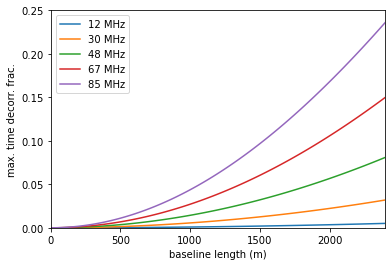

In [21]:
bl_lengths = np.linspace(1,bl_length,num=100)
freqs = np.linspace(min_frequency, max_frequency, num=5)
for use_freq in freqs:
    use_decorr = 1 - c/(np.pi*int_time*ang_vel*np.cos(lat+z)*np.cos(z)*bl_lengths*use_freq)*np.sin(np.pi*int_time*ang_vel*np.cos(lat+z)*np.cos(z)*bl_lengths*use_freq/c)
    plt.plot(bl_lengths, use_decorr, label=f"{int(np.round(use_freq/1e6))} MHz")
plt.ylim([0.,.25])
plt.xlim([0, bl_length])
plt.xlabel("baseline length (m)")
plt.ylabel("max. time decorr. frac.")
plt.legend()

plt.savefig("/Users/ruby/Downloads/time_decorr.png", dpi=400, facecolor="white")
plt.show()